In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('preprocessed_data.csv')
missing=dataset.isnull().sum()
print(missing)

step              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type__0           0
type__1           0
type__2           0
type__3           0
type__4           0
dtype: int64


In [3]:
x=dataset.drop(columns=['isFlaggedFraud','isFraud'])
y=dataset['isFraud']

In [4]:
x

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type__0,type__1,type__2,type__3,type__4
0,1,9839.64,403005,170136.0,160296.36,879262,0.00,0.00,0,0,0,1,0
1,1,1864.28,1163853,21249.0,19384.72,917252,0.00,0.00,0,0,0,1,0
2,1,181.00,532899,181.0,0.00,234096,0.00,0.00,0,0,0,0,1
3,1,181.00,3097189,181.0,0.00,208599,21182.00,0.00,0,1,0,0,0
4,1,11668.14,1831149,41554.0,29885.86,439742,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3378990,254,294271.78,2216777,0.0,0.00,303236,874201.10,920672.39,0,1,0,0,0
3378991,254,174820.94,3227251,0.0,0.00,207980,1366815.38,1541636.32,0,1,0,0,0
3378992,254,285780.37,2570477,0.0,0.00,114168,970397.97,1256178.34,0,1,0,0,0
3378993,254,40402.43,1623381,0.0,0.00,131756,166124.02,206526.46,0,1,0,0,0


In [5]:
y

0          0
1          0
2          1
3          1
4          0
          ..
3378991    0
3378992    0
3378993    0
3378994    0
3378995    0
Name: isFraud, Length: 3378996, dtype: int64

In [5]:
print(len(dataset))
print(len(x),len(y))

3378995
3378995 3378995


Nothing

In [6]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,stratify=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report 
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')
knn.fit(xtrain,ytrain)
ypre_knn=knn.predict(xtest)
print("report\n",classification_report(ytest,ypre_knn,digits=6))
# this takes 2m

report
               precision    recall  f1-score   support

           0   0.999593  0.999936  0.999765    675224
           1   0.874636  0.521739  0.653595       575

    accuracy                       0.999529    675799
   macro avg   0.937114  0.760838  0.826680    675799
weighted avg   0.999487  0.999529  0.999470    675799



In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

lda = LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
lda.fit(xtrain, ytrain)
ypre_lda = lda.predict(xtest)
print("lda report\n", classification_report(ytest, ypre_lda))
#13 sec

lda report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    675224
           1       0.63      0.44      0.52       575

    accuracy                           1.00    675799
   macro avg       0.82      0.72      0.76    675799
weighted avg       1.00      1.00      1.00    675799



In [9]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypre_lr=lr.predict(xtest)

mse = mean_squared_error(ytest, ypre_lr)
mae = mean_absolute_error(ytest, ypre_lr)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", rmse)
# 4sec

Mean Squared Error (MSE): 0.0007018091538874882
Mean Absolute Error (MAE): 0.004479910640092417
R-squared (R2) Score: 0.02649168084300217


In [10]:
mvl=sum(ypre_lr)/len(ypre_lr)
por=[0]*len(ytest)
for i in range(0,len(ypre_lr)):
    if(ypre_knn[i]==0 or ypre_lda[i]==0):
        if(ypre_lr[i]<mvl):
            por[i]=0
    elif(ypre_knn[i]==1 or ypre_lda[i]==1):
        if(ypre_lr[i]>mvl):
            por[i]=1
    else:
        por[i]=ypre_knn[i]

In [11]:
acc=accuracy_score(ytest,por)
pcc=precision_score(ytest,por)
ff=f1_score(ytest,por)
re=recall_score(ytest,por)
print("acc : ",acc)
print("pre : ",pcc)
print("f1  : ",ff)
print("re  : ",re)

acc :  0.9994524999297129
pre :  0.9218106995884774
f1  :  0.5476772616136919
re  :  0.38956521739130434


In [12]:
print(classification_report(ytest,por))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    675224
           1       0.92      0.39      0.55       575

    accuracy                           1.00    675799
   macro avg       0.96      0.69      0.77    675799
weighted avg       1.00      1.00      1.00    675799



In [7]:
c_0,c_1=y.value_counts()

In [8]:
c_1

2873

In [9]:
ds_with_c0=dataset[dataset['isFraud']==0]
ds_with_c1=dataset[dataset['isFraud']==1]

In [10]:
ds_with_c0.shape

(3376123, 15)

In [11]:
ds_with_c1.shape

(2873, 15)

In [12]:
ds_1_over=ds_with_c1.sample(c_0,replace=True)
ds_over=pd.concat([ds_with_c0,ds_1_over])
ds_over.shape

(6752246, 15)

In [13]:
x=ds_over.drop(columns=['isFlaggedFraud','isFraud'])
y=ds_over['isFraud']

In [14]:
y.value_counts()

isFraud
0    3376123
1    3376123
Name: count, dtype: int64

Over sampling

In [15]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report 
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')
knn.fit(xtrain,ytrain)
ypre_knn=knn.predict(xtest)
print("report\n",classification_report(ytest,ypre_knn,digits=6))
# this takes 2m

report
               precision    recall  f1-score   support

           0   1.000000  0.998762  0.999381    675225
           1   0.998763  1.000000  0.999381    675225

    accuracy                       0.999381   1350450
   macro avg   0.999382  0.999381  0.999381   1350450
weighted avg   0.999382  0.999381  0.999381   1350450



In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

lda = LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
lda.fit(xtrain, ytrain)
ypre_lda = lda.predict(xtest)
print("lda report\n", classification_report(ytest, ypre_lda))
#13 sec

lda report
               precision    recall  f1-score   support

           0       0.98      0.80      0.88    675225
           1       0.83      0.99      0.90    675225

    accuracy                           0.89   1350450
   macro avg       0.91      0.89      0.89   1350450
weighted avg       0.91      0.89      0.89   1350450



In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypre_lr=lr.predict(xtest)

mse = mean_squared_error(ytest, ypre_lr)
mae = mean_absolute_error(ytest, ypre_lr)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", rmse)
# 4sec

Mean Squared Error (MSE): 0.10049674234720693
Mean Absolute Error (MAE): 0.23850281351942387
R-squared (R2) Score: 0.31701221166889915


In [19]:
mvl=sum(ypre_lr)/len(ypre_lr)
por=[0]*len(ytest)
for i in range(0,len(ypre_lr)):
    if(ypre_knn[i]==0 or ypre_lda[i]==0):
        if(ypre_lr[i]<mvl):
            por[i]=0
    elif(ypre_knn[i]==1 or ypre_lda[i]==1):
        if(ypre_lr[i]>mvl):
            por[i]=1
    else:
        por[i]=ypre_knn[i]

In [20]:
acc=accuracy_score(ytest,por)
pcc=precision_score(ytest,por)
ff=f1_score(ytest,por)
re=recall_score(ytest,por)
print("acc : ",acc)
print("pre : ",pcc)
print("f1  : ",ff)
print("re  : ",re)

acc :  0.9924706579288385
pre :  0.9988388925975653
f1  :  0.9924222889635795
re  :  0.9860876004294865


In [21]:
print(classification_report(ytest,por))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    675225
           1       1.00      0.99      0.99    675225

    accuracy                           0.99   1350450
   macro avg       0.99      0.99      0.99   1350450
weighted avg       0.99      0.99      0.99   1350450



Under sampling

In [22]:
ds_under_0=dataset.sample(c_1,replace=True)
ds_under=pd.concat([ds_under_0,ds_with_c1])
ds_under.shape


(5746, 15)

In [23]:
x=ds_under.drop(columns=['isFlaggedFraud','isFraud'])
y=ds_under['isFraud']

In [24]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,stratify=y)

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report 
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2, weights='uniform')
knn.fit(xtrain,ytrain)
ypre_knn=knn.predict(xtest)
print("report\n",classification_report(ytest,ypre_knn,digits=6))
# this takes 1m45min

report
               precision    recall  f1-score   support

           0   0.888112  0.885017  0.886562       574
           1   0.885813  0.888889  0.887348       576

    accuracy                       0.886957      1150
   macro avg   0.886963  0.886953  0.886955      1150
weighted avg   0.886961  0.886957  0.886956      1150



In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

lda = LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001)
lda.fit(xtrain, ytrain)
ypre_lda = lda.predict(xtest)
print("lda report\n", classification_report(ytest, ypre_lda))
#13 sec

lda report
               precision    recall  f1-score   support

           0       0.99      0.79      0.88       574
           1       0.83      0.99      0.90       576

    accuracy                           0.89      1150
   macro avg       0.91      0.89      0.89      1150
weighted avg       0.91      0.89      0.89      1150



In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypre_lr=lr.predict(xtest)

mse = mean_squared_error(ytest, ypre_lr)
mae = mean_absolute_error(ytest, ypre_lr)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", rmse)
# 4sec

Mean Squared Error (MSE): 0.09560223101633031
Mean Absolute Error (MAE): 0.23246702196779295
R-squared (R2) Score: 0.30919610446499857


In [28]:
mvl=sum(ypre_lr)/len(ypre_lr)
por=[0]*len(ytest)
for i in range(0,len(ypre_lr)):
    if(ypre_knn[i]==0 or ypre_lda[i]==0):
        if(ypre_lr[i]<mvl):
            por[i]=0
    elif(ypre_knn[i]==1 or ypre_lda[i]==1):
        if(ypre_lr[i]>mvl):
            por[i]=1
    else:
        por[i]=ypre_knn[i]

In [29]:
acc=accuracy_score(ytest,por)
pcc=precision_score(ytest,por)
ff=f1_score(ytest,por)
re=recall_score(ytest,por)
print("acc : ",acc)
print("pre : ",pcc)
print("f1  : ",ff)
print("re  : ",re)

acc :  0.9026086956521739
pre :  0.9142857142857143
f1  :  0.9014084507042254
re  :  0.8888888888888888


In [30]:
print(classification_report(ytest,por))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       574
           1       0.91      0.89      0.90       576

    accuracy                           0.90      1150
   macro avg       0.90      0.90      0.90      1150
weighted avg       0.90      0.90      0.90      1150



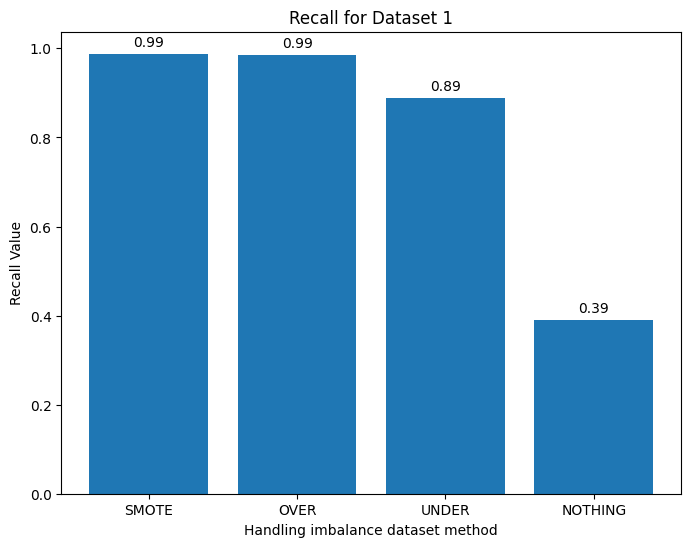

In [14]:
import matplotlib.pyplot as plt

# Model names and recall values
models = ['SMOTE', 'UNDER', 'OVER','NOTHING']
recall_values = [0.9879743789107335,0.8888888888888888, 0.9860876004294865,0.38956521739130434]

# Sort the model names and recall values by recall values in descending order
sorted_data = sorted(zip(recall_values, models), reverse=True)
sorted_recall_values, sorted_models = zip(*sorted_data)


# Plotting the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(sorted_models, sorted_recall_values)

# Adding recall values on top of each bar
for bar, value in zip(bars, sorted_recall_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Handling imbalance dataset method')
plt.ylabel('Recall Value')
plt.title('Recall for Dataset 1')

# Display the plot
plt.show()
